# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Практическое задание

<ol>
<li>Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. 
       Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
</li>
    
<li>Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.</li>
        
<li>*Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность? </li>  
    
</ol>

# Классификация изображений одежды

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
import pandas as pd
print(tf.__version__)

2.3.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

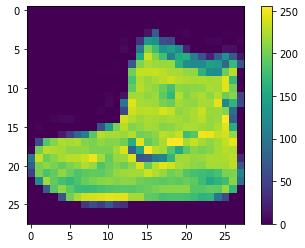

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [10]:
x_train = train_images / 255.0
y_train = train_labels
x_test = test_images / 255.0
y_test = test_labels

Посмотрим первые 25 изображений:

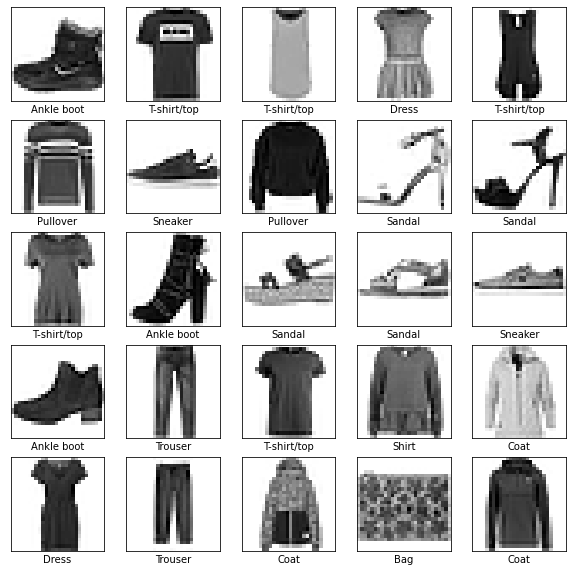

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

### Определение слоев

Создадим 3 слоя нейронной сети с помощью функционала Keras.layers с различными параметрами

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [12]:
# Build the model.
neurons_l1 =[128,512]
neurons_l2 =[0,64]
afs=['relu', 'tanh', 'sigmoid']
opts = ['sgd','adam', 'rmsprop']

def build_model(n1,n2, af, opt):
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28))])
    model.add(keras.layers.Dense(n1, activation=af)) 
    if len(neurons_l2)>0 and n2!=0:
        model.add(keras.layers.Dense(n2, activation=af)) 
    model.add(keras.layers.Dense(10))

    model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    model_name=f'Sequential_{n1}, {n2}, {af}, {opt}'
    return model, model_name

In [13]:
models=[]
models_names=[]
models_performance = pd.DataFrame(columns = ['Name', "neu_l1", "neu_l2", "activation_ft", "Optimizer", 
                                        'Train_Acc','Train_Loss', 'Test_Acc' ])
for n1 in neurons_l1:
    for n2 in neurons_l2:
        for af in afs:
            for opt in opts:
                model,  model_name =  build_model(n1,n2, af, opt)
                models.append(model)
                models_names.append(model_name)
                models_performance = models_performance.append(pd.DataFrame([[model_name, n1 ,n2, af, opt]], 
                                            columns = ['Name', "neu_l1", "neu_l2", "activation_ft", "Optimizer" ])
                                           ,ignore_index=True)


#model_performance.sort_values(by="Accuracy", ascending=False)

### Передача данных в модель

In [14]:
# Train the model.

#Adam(learning_rate=0.0001, beta_1=0.89)

histories=[]
predicts_accurance=[]
lepochs = [7]
batches_size = [32]
models_fe=[]
i=0
for epochs in lepochs:
    for batch_size in batches_size:
            for model, model_name in zip(models, models_names):
                print (f'\n!!!!!!--- {model_name} --- epochs {epochs} batch_size {batch_size} ---')
                model.summary()
                history= model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)
                histories.append(history)
                models_performance.loc[models_performance.index[i], 'Train_Acc'] = max(history.history['accuracy'])
                models_performance.loc[models_performance.index[i], 'Train_Loss'] = max(history.history['accuracy'])
                # Evaluate the model.
                print('Finish')
                acc = model.evaluate(x_test,y_test)[1]
                models_performance.loc[models_performance.index[i], 'Test_Acc'] = acc
                predicts_accurance.append(acc)
                i+=1


!!!!!!--- Sequential_128, 0, relu, sgd --- epochs 7 batch_size 32 ---
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7498 - accuracy: 0.7608
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5133 - accuracy: 0.8242
Epoch 3/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4678 - accuracy: 0.8390
Epoch 

Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4887 - accuracy: 0.8235
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3767 - accuracy: 0.8619
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3429 - accuracy: 0.8756
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3206 - accuracy: 0.8838
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3052 - accuracy: 0.8887
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2926 - accuracy: 0.8939
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2824 - accuracy: 0.8970
Finish
313/313 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.8812

!!!!!!--- Sequential_128, 0, sigmoid, sgd --- epochs 7 batch_size 32 ---
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output

Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4923 - accuracy: 0.8250
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3679 - accuracy: 0.8648
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3330 - accuracy: 0.8780
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3088 - accuracy: 0.8861
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2929 - accuracy: 0.8910
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2763 - accuracy: 0.8969
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2651 - accuracy: 0.8996
Finish
313/313 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8777

!!!!!!--- Sequential_128, 64, relu, rmsprop --- epochs 7 batch_size 32 ---
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Out

Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9931 - accuracy: 0.4389
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3044 - accuracy: 0.6083
Epoch 3/7
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0106 - accuracy: 0.6706
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8619 - accuracy: 0.7094
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7663 - accuracy: 0.7348
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7019 - accuracy: 0.7492
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6582 - accuracy: 0.7602
Finish
313/313 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.7550

!!!!!!--- Sequential_128, 64, sigmoid, adam --- epochs 7 batch_size 32 ---
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Out

Epoch 1/7
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4931 - accuracy: 0.8242
Epoch 2/7
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3792 - accuracy: 0.8655
Epoch 3/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3563 - accuracy: 0.8772
Epoch 4/7
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3429 - accuracy: 0.8836
Epoch 5/7
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3323 - accuracy: 0.8868
Epoch 6/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3260 - accuracy: 0.8928
Epoch 7/7
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3201 - accuracy: 0.8962
Finish
313/313 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.8619

!!!!!!--- Sequential_512, 0, tanh, sgd --- epochs 7 batch_size 32 ---
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 O

Epoch 1/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5016 - accuracy: 0.8217
Epoch 2/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3829 - accuracy: 0.8615
Epoch 3/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3438 - accuracy: 0.8732
Epoch 4/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3144 - accuracy: 0.8855
Epoch 5/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2917 - accuracy: 0.8923
Epoch 6/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2732 - accuracy: 0.8974
Epoch 7/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2595 - accuracy: 0.9031
Finish
313/313 [==============================] - 1s 2ms/step - loss: 0.3251 - accuracy: 0.8837

!!!!!!--- Sequential_512, 0, sigmoid, rmsprop --- epochs 7 batch_size 32 ---
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 O

Epoch 1/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6452 - accuracy: 0.7834
Epoch 2/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4640 - accuracy: 0.8371
Epoch 3/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4249 - accuracy: 0.8479
Epoch 4/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4010 - accuracy: 0.8566
Epoch 5/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3848 - accuracy: 0.8627
Epoch 6/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3725 - accuracy: 0.8655
Epoch 7/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3619 - accuracy: 0.8703
Finish
313/313 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8582

!!!!!!--- Sequential_512, 64, tanh, adam --- epochs 7 batch_size 32 ---
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output

Epoch 1/7
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5351 - accuracy: 0.8139
Epoch 2/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3826 - accuracy: 0.8605
Epoch 3/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3485 - accuracy: 0.8729
Epoch 4/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3241 - accuracy: 0.8822
Epoch 5/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3073 - accuracy: 0.8886
Epoch 6/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2924 - accuracy: 0.8932
Epoch 7/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2805 - accuracy: 0.8975
Finish
313/313 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8773


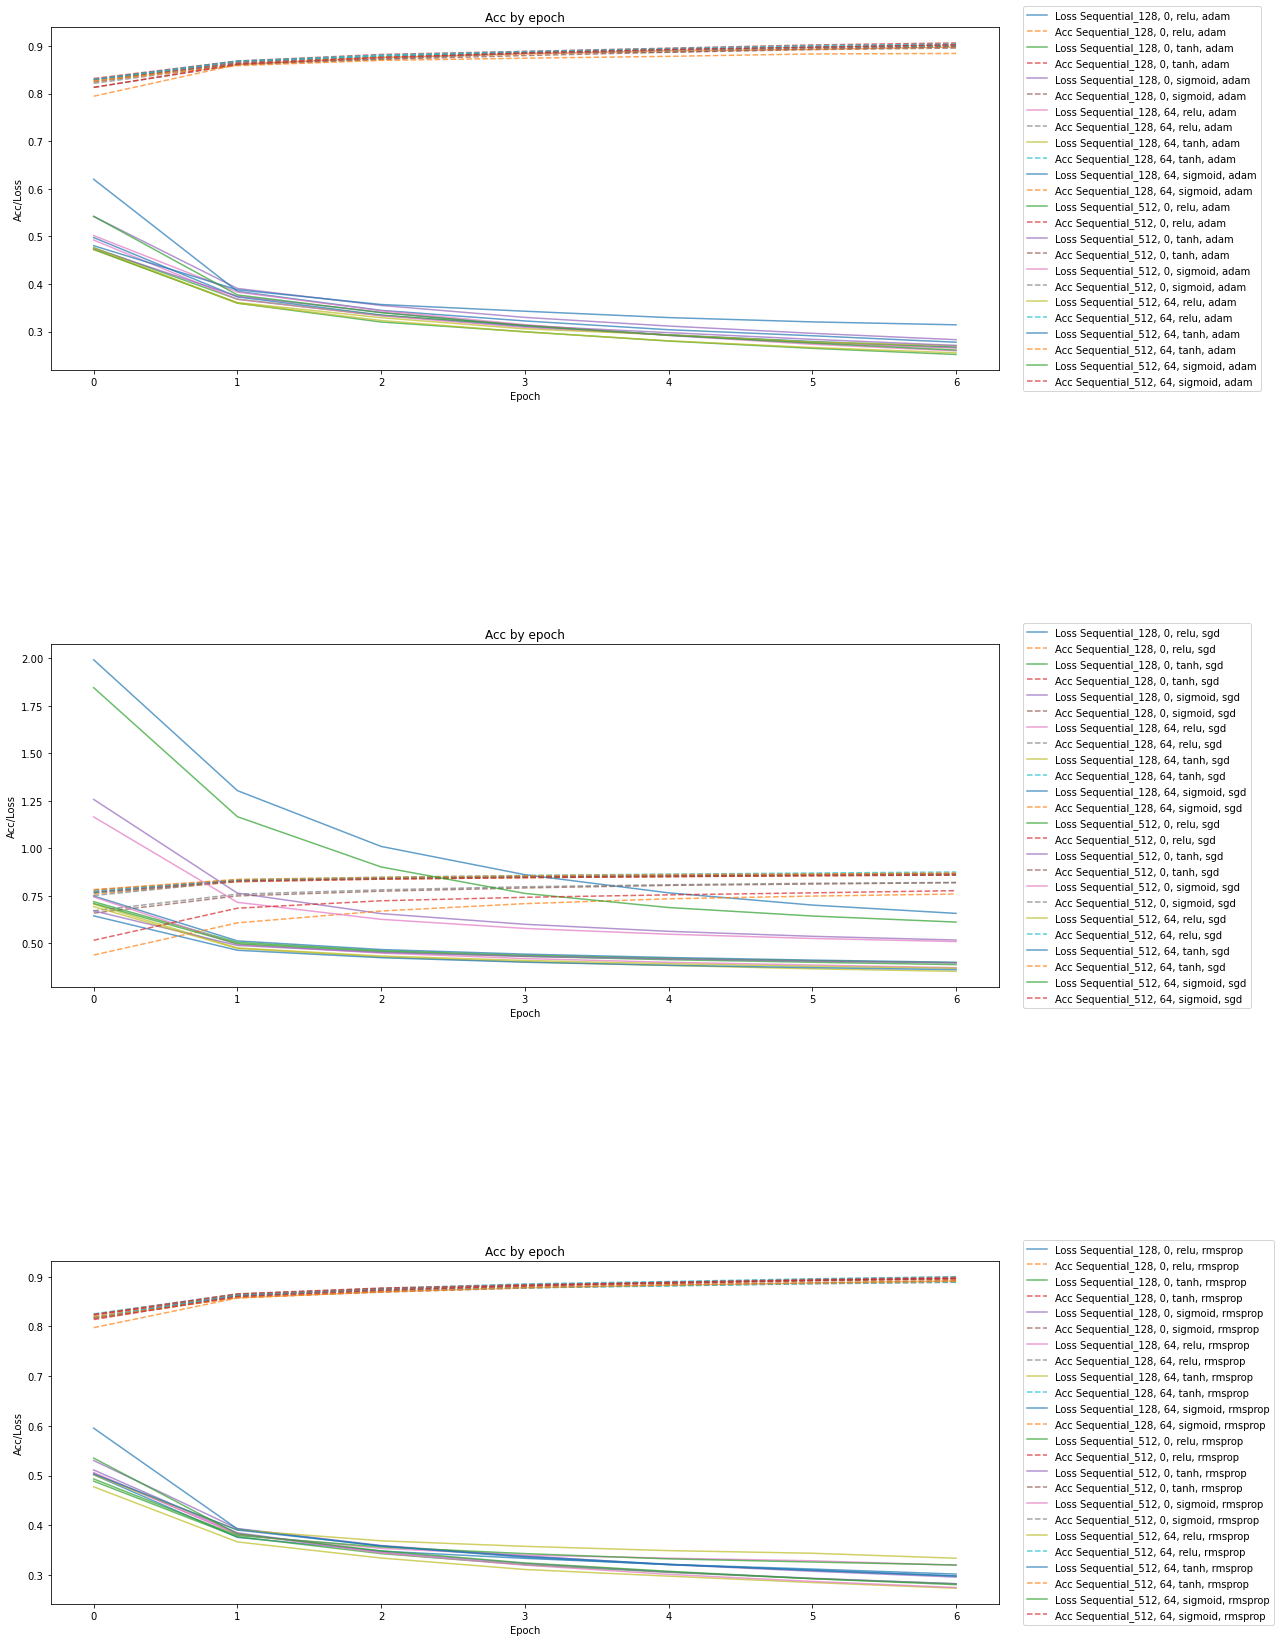

In [15]:
fig, axes = plt.subplots(ncols=1, nrows=3)
fig.set_size_inches(17, 29)
plt.subplots_adjust(wspace=0.2, hspace=0.8)
i = 0
for history in histories:
    if models_names[i][-4:]=='adam':
        axes[0].plot(history.history['loss'],
                linestyle='-',
                alpha=0.7,
                label=f'Loss {models_names[i]}')
        axes[0].plot(history.history['accuracy'],
                linestyle='--',
                alpha=0.7,
                label=f'Acc {models_names[i]}')
        axes[0].legend(loc='center left', bbox_to_anchor=(1.02, 0.5))   
    axes[0].set_title(f'Acc by epoch')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Acc/Loss')
    if models_names[i][-4:]==' sgd':
        axes[1].plot(history.history['loss'],
                linestyle='-',
                alpha=0.7,
                label=f'Loss {models_names[i]}')
        axes[1].plot(history.history['accuracy'],
                linestyle='--',
                alpha=0.7,
                label=f'Acc {models_names[i]}')
        axes[1].legend(loc='center left', bbox_to_anchor=(1.02, 0.5))   
    axes[1].set_title(f'Acc by epoch')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Acc/Loss')
    if models_names[i][-4:]=='prop':
        axes[2].plot(history.history['loss'],
                linestyle='-',
                alpha=0.7,
                label=f'Loss {models_names[i]}')
        axes[2].plot(history.history['accuracy'],
                linestyle='--',
                alpha=0.7,
                label=f'Acc {models_names[i]}')
        axes[2].legend(loc='center left', bbox_to_anchor=(1.02, 0.5))   
    axes[2].set_title(f'Acc by epoch')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('Acc/Loss' )                  
    i +=1

In [16]:
models_performance.sort_values(by="Test_Acc", ascending=False)

,Name,neu_l1,neu_l2,activation_ft,Optimizer,Train_Acc,Train_Loss,Test_Acc
14,"Sequential_128, 64, tanh, rmsprop",128,64,tanh,rmsprop,0.900133,0.900133,0.8845
25,"Sequential_512, 0, sigmoid, adam",512,0,sigmoid,adam,0.903067,0.903067,0.8837
34,"Sequential_512, 64, sigmoid, adam",512,64,sigmoid,adam,0.902817,0.902817,0.882
5,"Sequential_128, 0, tanh, rmsprop",128,0,tanh,rmsprop,0.896967,0.896967,0.8812
28,"Sequential_512, 64, relu, adam",512,64,relu,adam,0.9043,0.9043,0.8803
16,"Sequential_128, 64, sigmoid, adam",128,64,sigmoid,adam,0.898017,0.898017,0.8785
19,"Sequential_512, 0, relu, adam",512,0,relu,adam,0.906517,0.906517,0.8779
1,"Sequential_128, 0, relu, adam",128,0,relu,adam,0.90165,0.90165,0.8778
10,"Sequential_128, 64, relu, adam",128,64,relu,adam,0.899567,0.899567,0.8777
35,"Sequential_512, 64, sigmoid, rmsprop",512,64,sigmoid,rmsprop,0.8975,0.8975,0.8773


In [18]:
i=np.argmax(models_performance["Test_Acc"])
i

14

In [19]:
models_names[i]  # Лучшая сеть

'Sequential_128, 64, tanh, rmsprop'

In [20]:
predicted_classes = models[i].predict(x_test[:25])

In [21]:
predicts_accurance[i]

0.8845000267028809

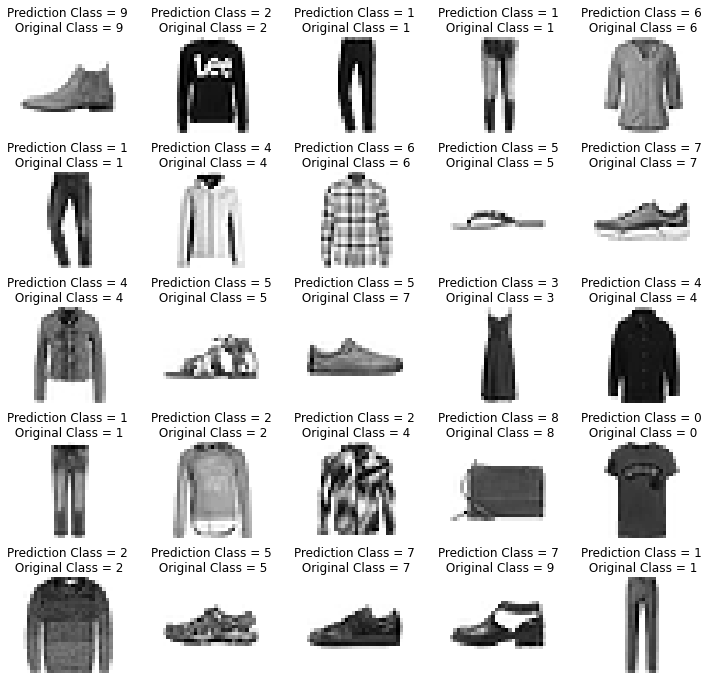

In [22]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28),  cmap=plt.cm.binary)
    axes[i].set_title(f"Prediction Class = {np.argmax(predicted_classes[i])}\n Original Class = {y_test[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)